In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [12]:
d0

Normal(loc: torch.Size([1]), scale: torch.Size([1]))

In [13]:
x, y = sample(d0, d1, 5)
x, y

(tensor([[-1.7171],
         [-0.2491],
         [-1.7248],
         [-2.7410],
         [-1.6396],
         [ 2.6917],
         [ 2.7348],
         [ 2.1879],
         [ 5.1987],
         [ 3.7302]]), tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]))

In [14]:
x.size()

torch.Size([10, 1])

In [15]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.5906]), tensor(-0.5162)]


In [16]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 1.787989
Ошибка после 1 итераций: 0.517446
Ошибка после 2 итераций: 0.312384
Ошибка после 3 итераций: 0.249202
Ошибка после 4 итераций: 0.220235
Ошибка после 5 итераций: 0.202684
Ошибка после 6 итераций: 0.188327
Ошибка после 7 итераций: 0.180436
Ошибка после 8 итераций: 0.173311
Ошибка после 9 итераций: 0.168840
Ошибка после 10 итераций: 0.163503
Ошибка после 11 итераций: 0.160079
Ошибка после 12 итераций: 0.156913
Ошибка после 13 итераций: 0.155854
Ошибка после 14 итераций: 0.153412
Ошибка после 15 итераций: 0.150734
Ошибка после 16 итераций: 0.150068
Ошибка после 17 итераций: 0.146896
Ошибка после 18 итераций: 0.146283
Ошибка после 19 итераций: 0.145570


In [17]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

In [20]:
x_scale, x.shape

(array([-10.       ,  -9.9959992,  -9.9919984, ...,   9.9919984,
          9.9959992,  10.       ]), torch.Size([2048, 1]))

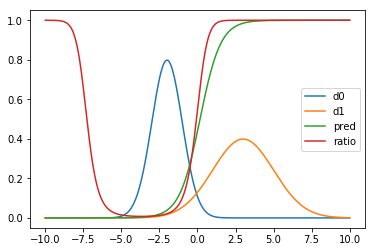

In [18]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.5457]), tensor(0.0029)]


In [10]:
torch.log(F.sigmoid(torch.tensor(-100.)))

C:\Users\AVP\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [11]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)